In [1]:
import sys
sys.path.append('/home/dominhnhat/Classroom/deepul')
from deepul.hw4_helper import *

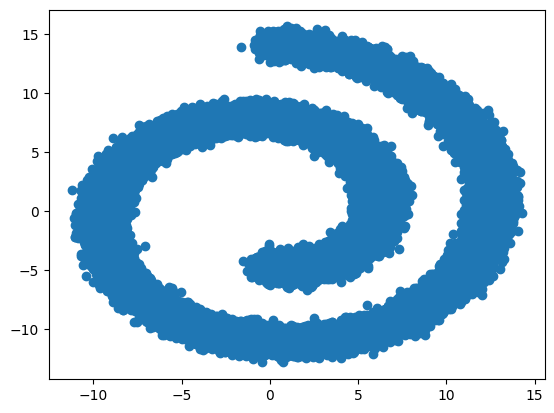

In [2]:
visualize_q1_dataset()

In [39]:
import numpy as np
num_step = 10
np.linspace(1 - 1e-4, 1e-4, num_step + 1)

array([9.9990e-01, 8.9992e-01, 7.9994e-01, 6.9996e-01, 5.9998e-01,
       5.0000e-01, 4.0002e-01, 3.0004e-01, 2.0006e-01, 1.0008e-01,
       1.0000e-04])

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torch.nn.functional import mse_loss

device = 'gpu'
batch_size = 1024
epochs = 100

class diffusion_network(nn.Module):
    def __init__(self, input_dim = 3, hidden_layer = [64, 64, 64, 64], output_dim = 2):
        super(diffusion_network, self).__init__()
        layer = []
        prev = input_dim
        for i in hidden_layer:
            layer.append(nn.Linear(prev, i))
            layer.append(nn.ReLU())
            prev = i
        layer.append(nn.Linear(prev, output_dim))

        self.net = nn.Sequential(*layer)
    
    def loss(self, X, timestep):
        total_loss = None
        pi = torch.tensor(torch.pi)

        for t in range(0, timestep + 1):
            alpha_t = torch.cos((pi/2) * t)
            sigma_t = torch.sin((pi/2) * t)
            eps = torch.randn(X.shape)
            X_t = alpha_t*X + sigma_t*eps
            eps_hat = self.forward(X_t, t)
            if (total_loss is None):
                total_loss = mse_loss(eps_hat, eps)
            else:
                total_loss += mse_loss(eps_hat, eps)
        
        return total_loss

    def forward(self, X, t):
        t_expanded = torch.full((batch_size, 1), t)
        new_input = torch.cat((X, t_expanded), dim = 1)
        return self.net(new_input)
    
    def sample(self, n, timestep):
        

def train_1_epoch(model : diffusion_network):


In [14]:
def q1(train_data, test_data):
    """
    train_data: A (100000, 2) numpy array of 2D points
    test_data: A (10000, 2) numpy array of 2D points

    Returns
    - a (# of training iterations,) numpy array of train losses evaluated every minibatch
    - a (# of num_epochs + 1,) numpy array of test losses evaluated at the start of training and the end of every epoch
    - a numpy array of size (9, 2000, 2) of samples drawn from your model.
      Draw 2000 samples for each of 9 different number of diffusion sampling steps
      of evenly logarithmically spaced integers 1 to 512
      hint: np.power(2, np.linspace(0, 9, 9)).astype(int)
    """

    """ YOUR CODE HERE """
    print(train_data.shape)
    return 0, 0, 0
    #return train_losses, test_losses, all_samples
q1_save_results(q1)

(100000, 2)


TypeError: 'int' object is not subscriptable